## [Kaggle - Predict survival on the Titanic and get familiar with ML basics](https://www.kaggle.com/c/titanic)

<img align="center" style="padding-right:10px;" src="titanic_kaggle.png">
<!--BOOK_INFORMATION-->

## Análise Exploratória de Dados com Visualização

### Importando os módulos para a Análise de Dados

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #configuração padrão do seaborn

## Carregando os datasets de treino e teste (baixados do Kaggle)

In [341]:
#test = pd.read_csv('./input/test.csv')
#train = pd.read_csv('./input/train.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Verificando o conjunto de dados de treinamento

In [342]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Abaixo, está uma breve informação sobre cada coluna do conjunto de dados:
1. **PassengerId:** Número que identifica o passageiro.
2. **Survived:** Mostra se o passageiro sobreviveu ou não. 1 significa que sobreviveu e 0 significa não sobreviveu.
3. **Pclass:** Classe do bilhete. 1 significa bilhete da primeira classe. 2 significa bilhete da segunda classe. 3 significa bilhete da terceira classe.
4. **Name:** Nome do passageiro. Nome também contém título. "Sr." para o homem. "Senhora" para mulher. "Senhorita" para menina. "Mestre" para menino.
5. **Sex:** sexo do passageiro: masculino ou feminino.
6. **Age:** Idade do passageiro. Os valores "NaN" nesta coluna indicam que a idade desse passageiro não foi registrada.
7. **SibSp:** Quantidade de cônjuges e irmãos no navio.
8. **Parch:** Quantidade de pais e filhos no navio.
9. **Ticket:** Número do ticket.
10. **Fare:** Valor pago pela viagem.
11. **Cabin:** Número da cabine do passageiro. Os valores "NaN" nesta coluna indicam que o número da cabine não foi registrado.
12. **Embarked:** Porto onde o passageiro embarcou.

### Total de linhas e colunas do dataset de treino

In [343]:
train.shape

(891, 12)

### Usando o método $describe()$ para obter informações estatísticas dos atributos do tipo numérico

In [344]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### O método $\mathrm{info()}$ mostra mais informações do dataset de treino.

In [345]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Podemos observar que o atributo *Age* está sem informações em muitas instâncias. 

Da mesma forma, o atributo *Cabin* foi informado em apenas 204 das 891 instâncias do dataset, ou seja, possui 687 dados faltantes!

Na célula abaixo podemos conferir os dados faltantes no dataset.

In [346]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Preencheremos os valores $NULL$ do atributo Idade(Age) com a mediana 

In [347]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [348]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Convertendo o Atributo $Sex$ de um valor categórico para numérico. Representaremos "1" para feminino(female) e "0" para masculino(male).

In [349]:
train['Sex'] = train['Sex'].replace(['male','female'],['0','1'])

In [350]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [351]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Selecionando os Atributos apropriados

Eliminaremos as colunas desnecessárias e ficaremos com as que serão úteis para treinarmos os algoritmos. 

A coluna $\mathrm{PassengerId}$ será removida apenas do conjunto de Treino, mas deve aparecer no conjunto de Teste porque precisamos dessa coluna para criar o arquivo de envio para o Kaggle.

In [352]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [353]:
train.drop(['PassengerId','Name','Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
### axis=1 indica a retirada da coluna inteira, e não apenas uma linha

In [354]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,28.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


#  Verificando o dataset de teste

In [355]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [356]:
test.shape

(418, 11)

## A coluna $\color{red}{Survived}$ não está presente nos dados de teste.
### Temos que treinar nosso classificador usando os dados em $Train$ e gerar predições nos dados de $Test$.

## Verificando dados faltantes

In [357]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Também há entradas ausentes para o atributo "Age" no conjunto de dados Test.

Das 418 linhas do conjunto de dados de teste, apenas 332 linhas têm o valor de idade.

Os valores da cabine também estão ausentes em várias linhas. Apenas 91 linhas de 418 têm valores para a coluna Cabin.

Existem 86 instâncias com dados faltantes no atributo *Age*, 327 dados faltantes no atributo  *Cabin*  e 1 linha com dados faltantes no atributo *Fare*.

## Preparando o dataframe de teste

In [358]:
test['Age'] = test['Age'].fillna(test['Age'].median())

In [359]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [360]:
test['Sex'] = test['Sex'].replace(['male','female'],['0','1'])

In [361]:
test.drop(['Name','Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [362]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500
414,1306,1,1,39.0,0,0,108.9000
415,1307,3,0,38.5,0,0,7.2500
416,1308,3,0,27.0,0,0,8.0500


## Relação entre o atributo $\mathrm{Survived}$ e os demais atributos

Nesta seção, analisaremos a relação entre diferentes atributos em relação a * Survived *.

In [363]:
sobreviveu = train[train['Survived'] == 1]
nao_sobreviveu = train[train['Survived'] == 0]

print ("Sobreviveu: %i"%(len(sobreviveu)))
print ("Não Sobreviveu: %i"%(len(nao_sobreviveu)))
print ("Total: %i"%len(train))

Sobreviveu: 342
Não Sobreviveu: 549
Total: 891


### Pclass x Survived

Passageiros da primeira classe tiveram maior chance de sobreviver.

Abaixo está a quantidade de sobreviventes por classe social.

In [364]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Detalhando os resultados acima

In [365]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

# Visualizações

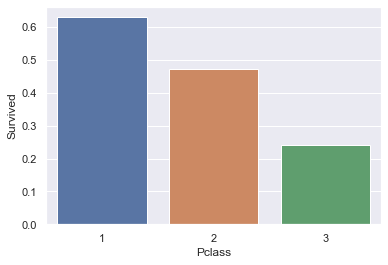

In [397]:
sns.barplot(x='Pclass', y='Survived', ci=None, data=train)

### Sex x Survived

As pessoas do sexo feminino tiveram maior chance de sobreviver.

In [367]:
train.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [368]:
train.groupby('Sex').Survived.value_counts()

Sex  Survived
0    0           468
     1           109
1    1           233
     0            81
Name: Survived, dtype: int64

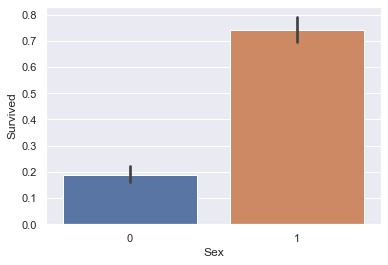

In [398]:
sns.barplot(x='Sex', y='Survived', data=train)

### (Pclass e Sex) x Survived

C:\Users\jota_\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\jota_\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


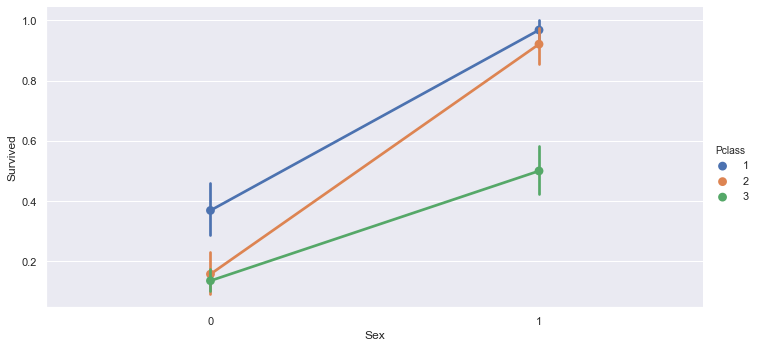

In [399]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=5, aspect=2, data=train)

Pelo gráfico acima podemos deduzir que:
- A chance de sobrevivência das mulheres da primeira e segunda classes foram muita alta, quase 100%! 
- Homens da segunda e terceira classes tiveram chances mínimas de sobreviver, em torno de 10%.

## Identificando $outliers$

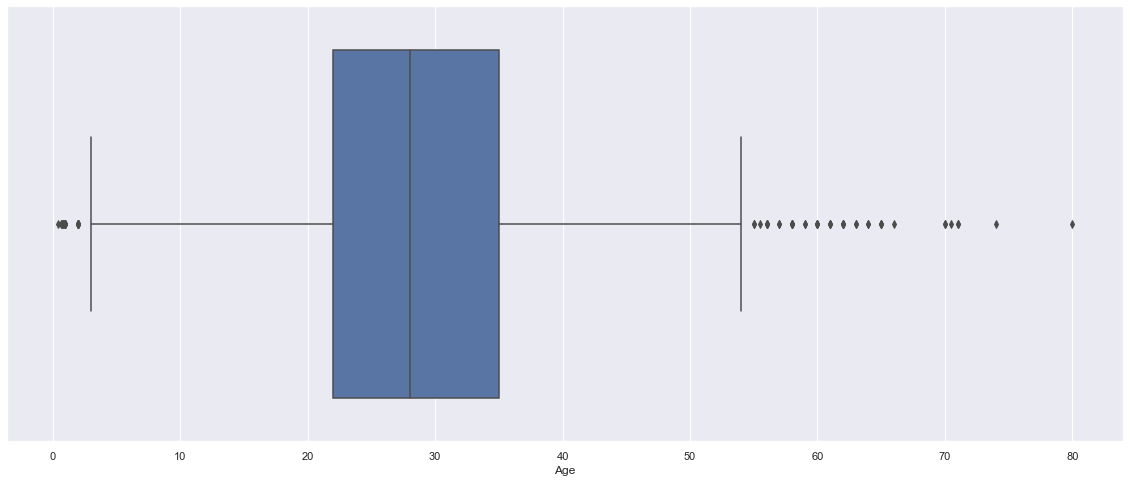

In [402]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x=train["Age"])

In [378]:
train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

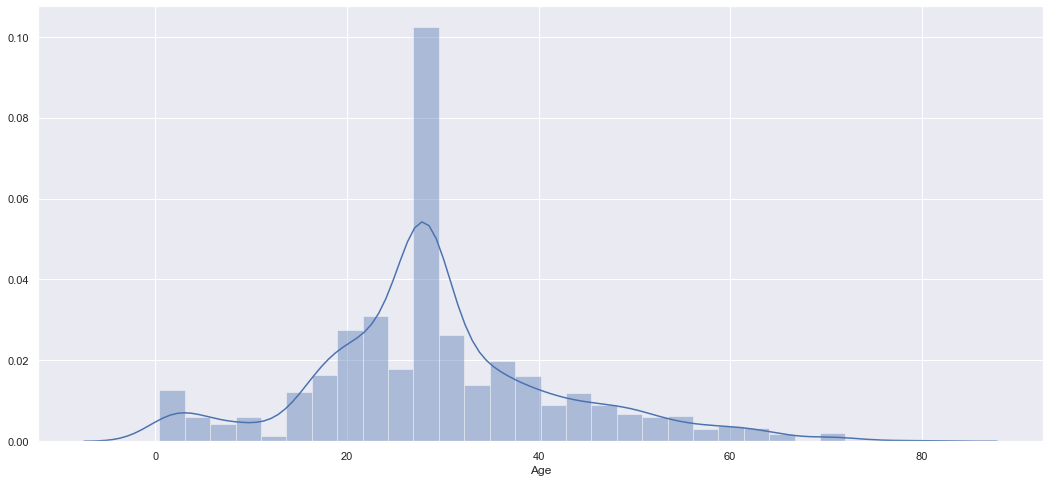

In [403]:
plt.figure(figsize=(18,8))
sns.distplot(train['Age']);

### Age x Survived

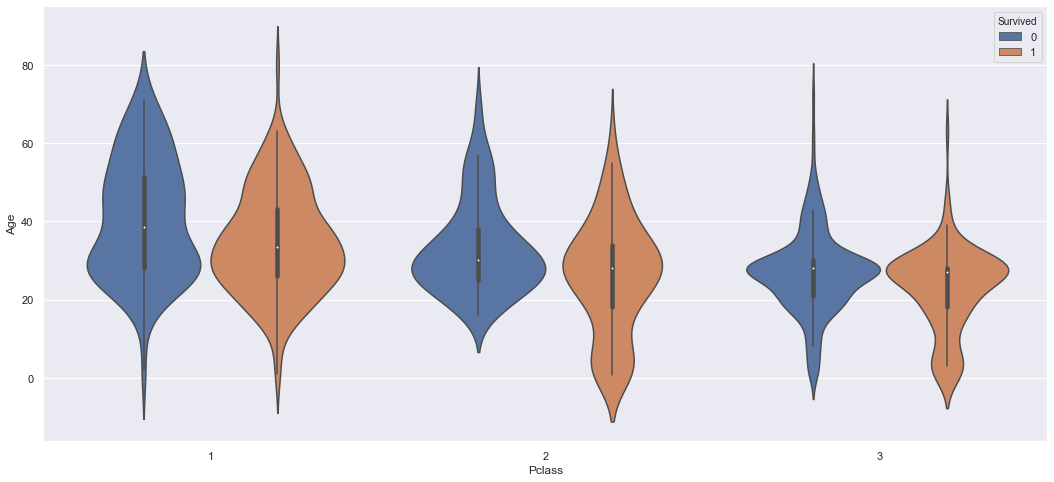

In [404]:
fig = plt.figure(figsize=(18,8))

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train)

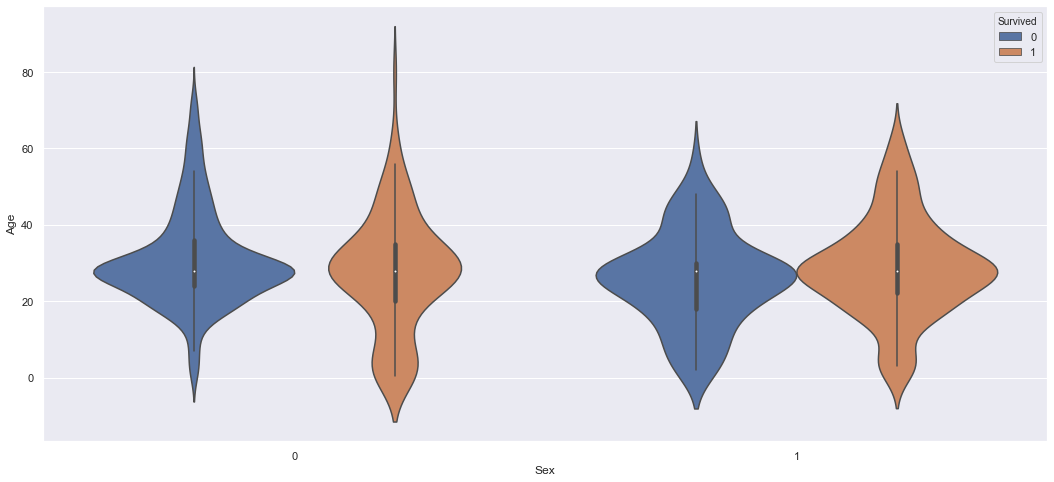

In [372]:
fig = plt.figure(figsize=(18,8))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train)

A partir do gráfico $violinplot$ para o atributo Pclass, podemos ver que:

- A 1ª classe bem menos crianças em comparação com as outras duas classes.
- A 1ª classe tem mais idosos do que as outras duas classes.
- Quase todas as crianças (entre 0 e 10 anos) da 2ª classe sobreviveram.
- A maioria das crianças da 3ª classe sobreviveu.
- Tiveram mais sobreviventes mais jovens na 1ª Classe que sobreviventes mais velhos.

Para o atributo Sex, o gráfico $violinplot$ mostra que:

- A maioria das crianças do sexo masculino (entre 0 e 14 anos) sobreviveu.
- Mulheres com idade entre 18 e 40 anos tiveram melhores chances de sobrevivência.

### Correlacionando Atributos

Mapa de calor da Correlação entre diferentes atributos:

>Números positivos => correlação positiva, ou seja, o aumento de um atributo aumentará o outro atributo e vice-versa.
>
>Números negativos => correlação negativa, ou seja, o aumento de um atributo diminuirá o outro atributo e vice-versa.

Mais pra frente selecionaremos apenas os atributos que têm forte correlação positiva ou negativa com o atributo * Survived *.


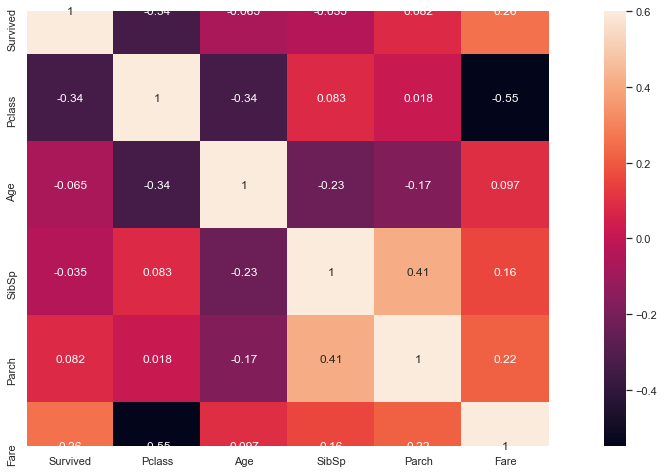

In [401]:
plt.figure(figsize=(20,8))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

# Treinando um Classificador

<img align="left" style="padding-right:10px;" src="scikit.png">
<!--BOOK_INFORMATION-->

## *scikit-learn* [Machine Learning in Python](https://scikit-learn.org/stable/)


### Definindo os conjuntos de treino e teste

In [405]:
treino = train.drop('Survived', axis=1)  ### armazena os dados do passageiro sem o atributo 'Survived'
labels_treino = train['Survived']               ### armazena o que nós queremos prever, que é a a coluna Survived, 
                                          ### informando se o tripulante sobreviveu (1) ou não (0).

teste = test.drop("PassengerId", axis=1)    ### 

In [407]:
teste

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500
414,1,1,39.0,0,0,108.9000
415,3,0,38.5,0,0,7.2500
416,3,0,27.0,0,0,8.0500


In [408]:
treino

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,28.0,1,2,23.4500
889,1,0,26.0,0,0,30.0000


Os algoritmos de Classificação(Classificadores) que usaremos:

- Logistic Regression
- Support Vector Machines (SVC)
- k-Nearest Neighbor (KNN)
- Decision Tree
- Random Forest
- Naive Bayes (GaussianNB)
- Perceptron

### Como é feito o procedimento de treinamento e teste:

> Inicialmente os classificadores são treinados com nossos dados de treinamento.
>
> Depois disso, usando o classificador treinado, prevemos o resultado *Survived* dos dados do teste.
>
> Finalmente, calculamos a acurácia (em porcentagem) do classificador treinado.

In [410]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

### Para saber mais sobre $Logistic Regression$

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)

In [411]:
clf = LogisticRegression()  # Inicializa o classificador
clf.fit(treino, labels_treino)   # Treina o classificador
predicao_lg = clf.predict(teste)  # Faz a previsão
acuracia_lg = round( clf.score(treino, labels_treino) * 100, 2)  # Escore da acurácia obtida pelo classificador em percentual
print(predicao_lg)    # Mostra as predições realizadas no arquivo de teste
print (str(acuracia_lg) + ' %')

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
80.02 %


C:\Users\jota_\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Para saber mais sobre Support Vector Machine (SVM)

[Support Vector Machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine)

In [412]:
clf = SVC()
clf.fit(treino, labels_treino)
predicao_svm = clf.predict(teste)
acuracia_svm = round(clf.score(treino, labels_treino) * 100, 2)
print (predicao_svm)
print (acuracia_svm)

[0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0
 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]
89.79


C:\Users\jota_\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Para saber mais sobre $k$-Nearest Neighbors

[$k$-nearest neighbors algorithm (k-NN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [413]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(treino, labels_treino)
predicao_knn = clf.predict(teste)
acuracia_knn = round(clf.score(treino, labels_treino) * 100, 2)
print (predicao_knn)
print (acuracia_knn)

[0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0
 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1
 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1
 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0
 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 0]
84.4


### Para saber mais sobre Decision Tree

[Decision tree](https://en.wikipedia.org/wiki/Decision_tree)

In [414]:
clf = DecisionTreeClassifier()
clf.fit(treino, labels_treino)
predicao_dt = clf.predict(teste)
acuracia_dt = round(clf.score(treino, labels_treino) * 100, 2)
#print (labels_treino)
print (predicao_dt)
print (acuracia_dt)

[0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0
 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1
 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
97.98


### Para saber mais sobre Random Forest e Ensembles

[Random forest](https://en.wikipedia.org/wiki/Random_forest)

[Ensemble methods](https://en.wikipedia.org/wiki/Ensemble_learning)

In [415]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(treino, labels_treino)
predicao_rf = clf.predict(teste)
acuracia_rf = round(clf.score(treino, labels_treino) * 100, 2)
print(predicao_rf)
print (acuracia_rf)

[0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
97.98


### Para saber mais sobre Naive Bayes

[Naive Bayes classifiers](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

In [416]:
clf = GaussianNB()
clf.fit(treino, labels_treino)
predicao_gnb = clf.predict(teste)
acuracia_gnb = round(clf.score(treino, labels_treino) * 100, 2)
print(predicao_gnb)
print (acuracia_gnb)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]
79.24


### Para saber mais sobre Perceptron (Classificador Linear)

[Perceptron](https://en.wikipedia.org/wiki/Perceptron)

In [417]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(treino, labels_treino)
predicao_perceptron = clf.predict(teste)
acuracia_perceptron = round(clf.score(treino, labels_treino) * 100, 2)
print (predicao_perceptron)
print (acuracia_perceptron)

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]
43.21


## Comparando os Modelos

Vamos comparar a acurácia dos modelos de classificadores usados acima.

In [418]:
modelos = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'Support Vector Machines',  
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron'],
    
    'Score': [acuracia_lg, acuracia_svm,  
              acuracia_knn,  acuracia_dt, acuracia_rf, acuracia_gnb, 
              acuracia_perceptron]
    })

modelos.sort_values(by='Score', ascending=False)

,Modelo,Score
3,Decision Tree,97.98
4,Random Forest,97.98
1,Support Vector Machines,89.79
2,KNN,84.40
0,Logistic Regression,80.02
5,Naive Bayes,79.24
6,Perceptron,43.21


Na tabela acima, podemos ver que os classificadores *Decision Tree* e * Random Forest * têm as melhores acurácias.

Escolhemos *Random Forest* para gerar o arquivo de submissão ao Kaggle.

## Gerando o arquivo que será submetido ao Kaggle

In [419]:
enviar = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": predicao_rf})

enviar.to_csv('enviar_kaggle.csv', index=False)

In [420]:
enviar = pd.read_csv('enviar_kaggle.csv')

In [425]:
enviar

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [424]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500
414,1306,1,1,39.0,0,0,108.9000
415,1307,3,0,38.5,0,0,7.2500
416,1308,3,0,27.0,0,0,8.0500
